# 数据应用学院Data Scientist Program Hw2

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
plt.style.use('ggplot')

#### 1. Gnerate x = a sequence of points, y = sin(x)+a small random error;
#### 2. Draw a scatter plot of x and y

In [88]:
np.random.seed(1)
x = np.linspace(0, 10, 101)
y = np.sin(x) + 0.3 * np.random.randn(len(x))

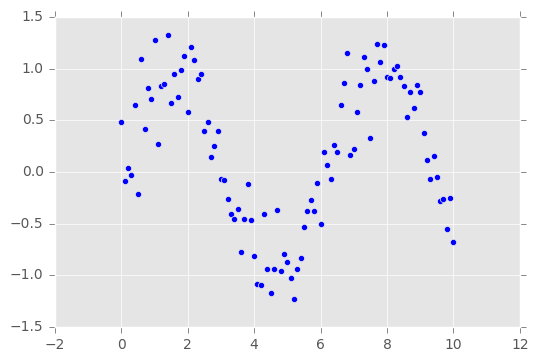

In [89]:
plt.scatter(x, y)
plt.show()

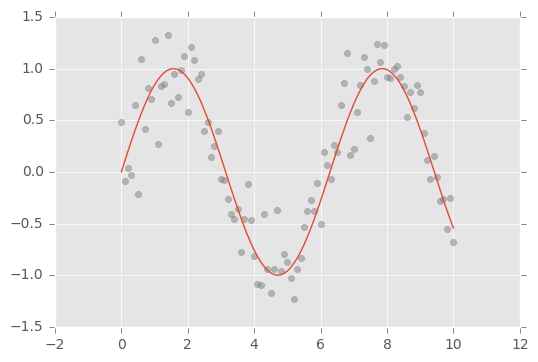

In [90]:
plt.scatter(x,y,color = 'gray', alpha = 0.5)
plt.plot(x, np.sin(x))

In [91]:
from sklearn import linear_model, metrics, cross_validation

In [92]:
X = x.reshape(len(x), 1)
Y = y
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size = 0.2)

In [93]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
training_score = metrics.mean_squared_error(y_train, model.predict(x_train))
validation_score = metrics.mean_squared_error(y_test, model.predict(x_test))
print training_score, validation_score

0.485976923743 0.492713841285


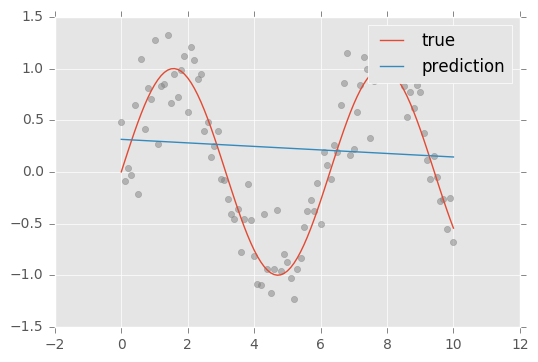

In [95]:
coef = model.coef_
intercept = model.intercept_
y_predict = intercept + coef * X
plt.plot(x, np.sin(x), label = 'true')
plt.plot(x, y_predict, label = 'prediction')
plt.scatter(x, y, color = 'gray', alpha = 0.5)
plt.legend()

In [96]:
X2 = np.hstack((X, np.power(X, 2)))
Y2 = y

In [97]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X2, Y2, test_size = 0.2)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
training_score = metrics.mean_squared_error(y_train, model.predict(x_train))
validation_score = metrics.mean_squared_error(y_test, model.predict(x_test))
print training_score, validation_score

0.427943117771 0.417876420352


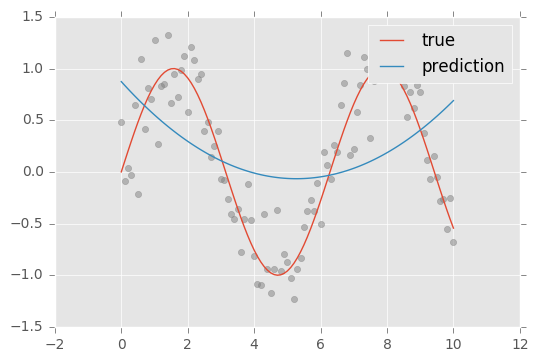

In [98]:
coef = model.coef_
intercept = model.intercept_
y_predict = intercept + np.sum(coef * X2, 1)
plt.plot(x, np.sin(x), label = 'true')
plt.plot(x, y_predict, label = 'prediction')
plt.scatter(x, y, color = 'gray', alpha = 0.5)
plt.legend()

In [99]:
lst_training_score = []
lst_validation_score = []
for i in range(1, 16):
    X = np.hstack((X, np.power(x.reshape(len(x), 1), i)))
    Y = y
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size = 0.2)
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    training_score = metrics.mean_squared_error(y_train, model.predict(x_train))
    validation_score = metrics.mean_squared_error(y_test, model.predict(x_test))
    lst_training_score.append(training_score)
    lst_validation_score.append(validation_score)

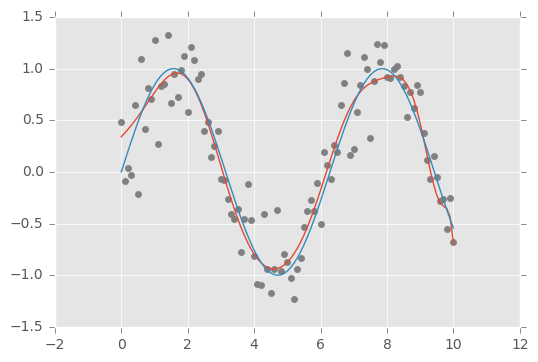

In [104]:
plt.plot(x, np.sum(model.coef_ * X, 1) + model.intercept_, label = 'prediction')
plt.plot(x, np.sin(x), label = 'true')
plt.scatter(x, y, color = 'gray')

In [109]:
import sklearn
sklearn.__version__

'0.18.1'

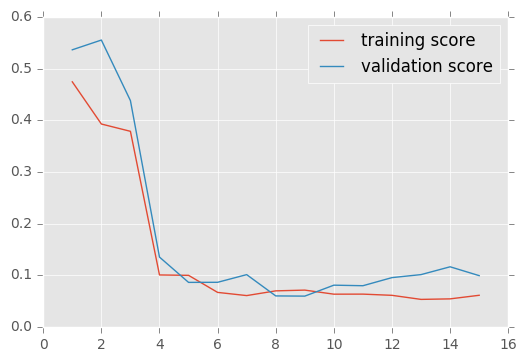

In [101]:
a = range(1, 16)
plt.plot(a, lst_training_score, label = 'training score')
plt.plot(a, lst_validation_score, label = 'validation score')
plt.legend()
plt.show()

In [52]:
x = np.random.random(2000) * 20
sin_x = np.sin(x)
y = np.sin(x) + np.random.normal(loc = 0, scale = 0.1, size = 2000)

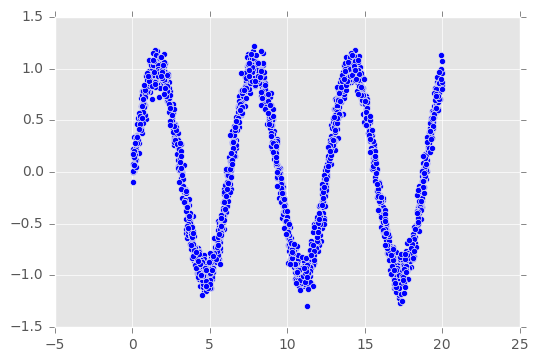

In [53]:
plt.scatter(x, y)
plt.show()

#### 3. Run a linear regression model to predict y, using only one feature--x;
#### print out the CV score of your model and the mathematical formula of your model;

In [54]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [55]:
# transform the arrary into a (n, 1) shape 2D-data for model fitting
x = x.reshape((len(x), 1))
X = x

In [56]:
fit = lr.fit(X, y)
fit.coef_

array([-0.01668831])

In [57]:
coef, intercept = fit.coef_, fit.intercept_
print "The regression line in our model is y = %f * x + %f" % (coef, intercept) 

The regression line in our model is y = -0.016688 * x + 0.161901


In [58]:
### Cross validation 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

In [59]:
from sklearn.model_selection import KFold
def manual_cv_mse(X, y, n):
    kf = KFold(n_splits = n)
    mse_error = np.zeros(n)
    i = 0
    lr = linear_model.LinearRegression()
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        fit = lr.fit(X_train, y_train)
        y_pred = fit.predict(X_test)
        error = mse(y_test, y_pred)
        mse_error[i] = error
        i += 1
    mse_cv = mse_error.mean()
    #print "mse itself"
    #print mse_error
    return mse_cv

In [60]:
a = manual_cv_mse(X, y, 10)

In [61]:
a

0.4896074541424279

### why cross_val so small using cvs?

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_val_score(lr, X, y, cv = 10)

array([ 0.0384614 ,  0.01753211,  0.02376075, -0.00504616,  0.01099718,
        0.03948047,  0.01472034,  0.01563935, -0.03068313,  0.02798043])

In [64]:
fit.coef_

array([-0.01668831])

#### 4. Draw a plot showing your predicted y, the real y, and ground truth--sin(x);

C:\Users\hua\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


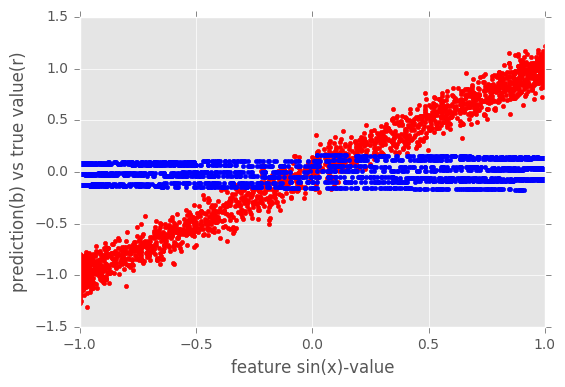

In [65]:
y_pred = fit.predict(X)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sin_x, y, '.r')
ax.plot(sin_x, y_pred, '.b')
plt.xlabel('feature sin(x)-value')
plt.ylabel('prediction(b) vs true value(r)')
fig.show()

#### 5. Try to run a linear model using two features--x and x**2;
#### print out CV score and mathematical formula;

In [66]:
x2 = x ** 2
X = np.hstack((x, x2))
fit2 = lr.fit(X, y)
print "The predicted curve is %f + %f * x + %f * x^2" % (fit2.intercept_, fit2.coef_[0], fit2.coef_[1])

The predicted curve is 0.403244 + -0.088684 * x + 0.003589 * x^2


In [67]:
manual_cv_mse(X, y, 10)

0.47837637959052087

#### 6. Try linear models with feature from x, to x, x**2, x**3,... x**15, and plot the training score and validation score showing what happens when feature set gets larger;
#### Accoding to the result you get, what's the best number of features here;

In [68]:
training_score = np.zeros(50)
cv_score = np.zeros(50)

In [69]:
def feature_map(deg, x, X):
    # generate the current degree feature and add it to existing dataset
    if deg > 1:
        X = np.hstack((X, x ** deg))
    return X

In [70]:
for deg in range(1, 50):
        # apply the feature transform
        X = feature_map(deg, x, X)
        fit = lr.fit(X, y)
        mse_error_cv = manual_cv_mse(X, y, 10)
        mse_error_train = mse(y, fit.predict(X))
        # keep a record of the above score, the degree always differ by the index by 1
        training_score[deg - 1] = mse_error_train
        cv_score[deg - 1] = mse_error_cv

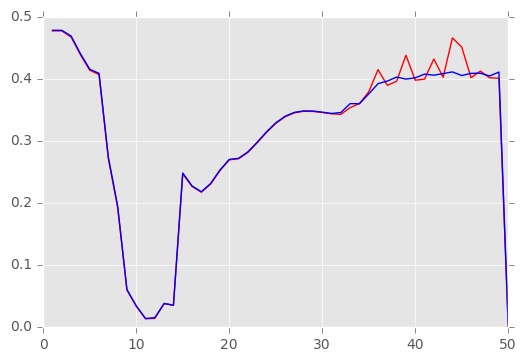

In [71]:
plt.plot(range(1, 51), training_score, color = 'r')
plt.plot(range(1, 51), cv_score, color = 'b')
plt.show()

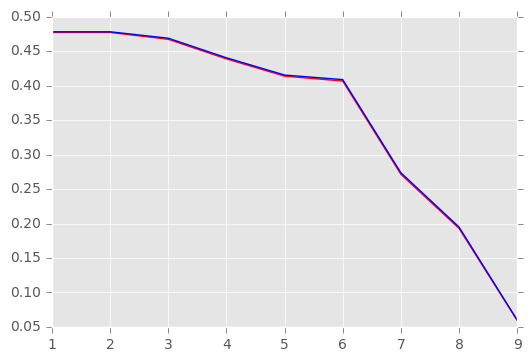

In [72]:
plt.plot(range(1, 10), training_score[0:9], color = 'r')
plt.plot(range(1, 10), cv_score[0:9], color = 'b')
plt.show()

# degree 10 is the ideal choice

#### 7. download a .xlsx file with multiple sheets nad read them all into pandas dataframe

In [73]:
#pd.read_excel('C:\\Users\Hua\Downloads\EUAS.xlsx')

In [74]:
# it's a 80MB file, took me a long time to read it